<a href="https://colab.research.google.com/github/LeonardoFisAct/Models-Class/blob/main/Practica_Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
install.packages("pacman")
library("pacman")
p_load(actuar,dplyr,ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [14]:
recal<-c(144,134,185,141,205,126,123,152,123,215,170,175,180,175,160,185,168,172,178,169)

reclam <- rlnorm(20, meanlog=2.5, sdlog= 2.5)

bootstrap_mse <- function(data, n_bootstrap){
  mse_values <- numeric(n_bootstrap)
  for (i in 1:n_bootstrap) {
    sample_data <- sample(data, replace = TRUE)
    mse_values[i] <- mean((sample_data - mean(sample_data))^2)
  }
  return(as.data.frame(mse_values))
}

#Estimacion del MSE usando bootstrap
n_bootstrap <- 10000
mse_values<-bootstrap_mse(recal,n_bootstrap)


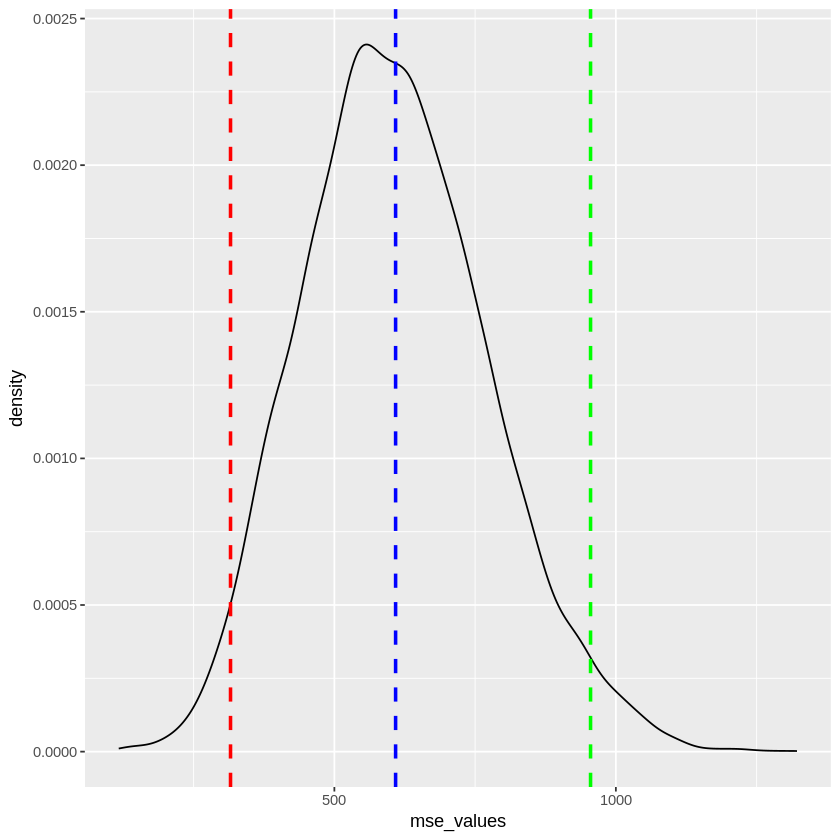

In [23]:
#Datos csv
p <- ggplot(mse_values,aes(x=mse_values)) +
  geom_density()+
  geom_vline(aes(xintercept=mean(mse_values)),
              color="blue", linetype="dashed", size=1)+
  geom_vline(aes(xintercept=quantile(mse_values,0.025)),
              color="red", linetype="dashed", size=1)+
  geom_vline(aes(xintercept=quantile(mse_values,0.975)),
              color="green", linetype="dashed", size=1)

p

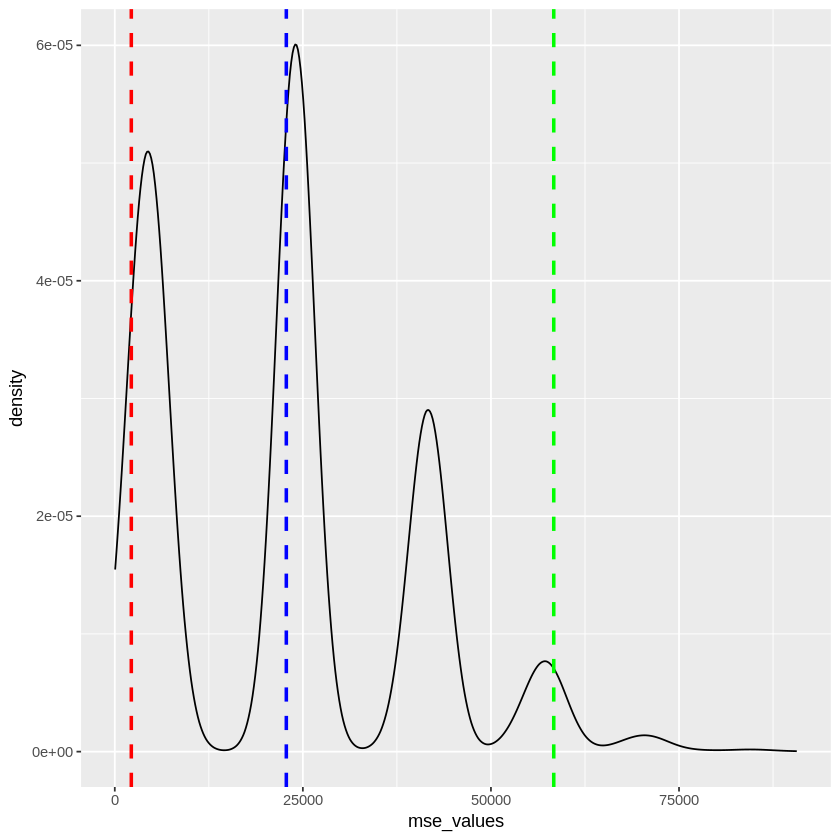

In [24]:
mse_values<-bootstrap_mse(reclam,n_bootstrap)
#Datos csv
p <- ggplot(mse_values,aes(x=mse_values)) +
  geom_density()+
  geom_vline(aes(xintercept=mean(mse_values)),
              color="blue", linetype="dashed", size=1)+
  geom_vline(aes(xintercept=quantile(mse_values,0.025)),
              color="red", linetype="dashed", size=1)+
  geom_vline(aes(xintercept=quantile(mse_values,0.975)),
              color="green", linetype="dashed", size=1)

p